## **Customer Churn Prediction and Strategic Retention Planning in Banking**

### **Problem Statement**
Customer churn is a major challenge for financial institutions, particularly in the banking sector, where customer retention directly impacts profitability. Losing customers not only reduces revenue but also increases acquisition costs for new customers. Understanding the factors that lead to customer churn and predicting it in advance can help banks take proactive measures to improve customer retention.

This project aims to develop a machine learning-based predictive model to identify customers who are likely to leave the bank. By analyzing customer demographics, financial attributes, and banking behaviors (such as credit score, balance, tenure, number of products used, and active membership status), we seek to uncover the key drivers of customer churn.

We will employ Random Forest, Logistic Regression, Support Vector Machine (SVM), and Decision Trees to classify customers as churned or non-churned and determine which model performs best. The insights gained from this project will help banks implement targeted retention strategies to reduce customer attrition.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [9]:
customer_data = pd.read_csv("Bank Customer Churn Prediction.csv")
customer_data.shape

(10000, 12)

In [10]:
import warnings
warnings.filterwarnings("ignore")

##### Explanatory Data Analysis

In [12]:
customer_data.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [13]:
customer_data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [14]:
customer_data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [15]:
customer_data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
customer_data.groupby('gender').count()


,customer_id,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
gender,,,,,,,,,,,
Female,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543
Male,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457


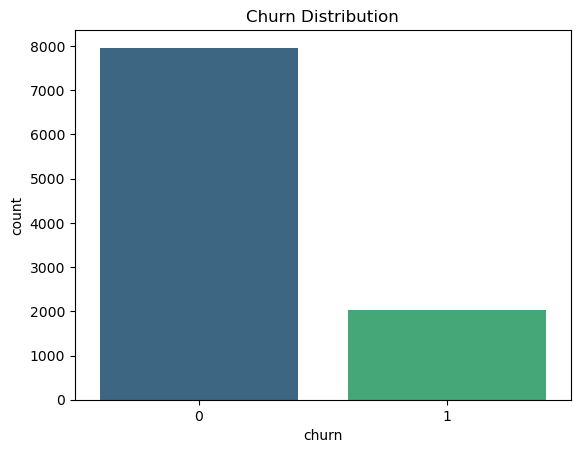

In [17]:
sns.countplot(data=customer_data,x='churn', palette="viridis")
plt.title('Churn Distribution')
plt.show()

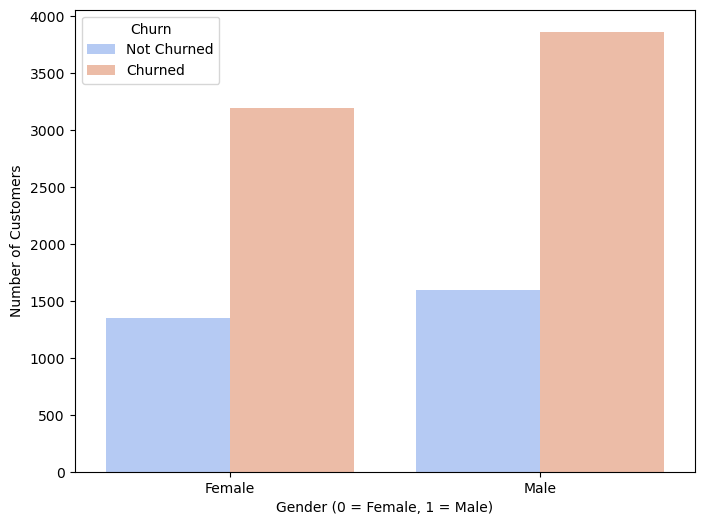

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=customer_data,x = 'gender',hue= 'credit_card', palette = 'coolwarm')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

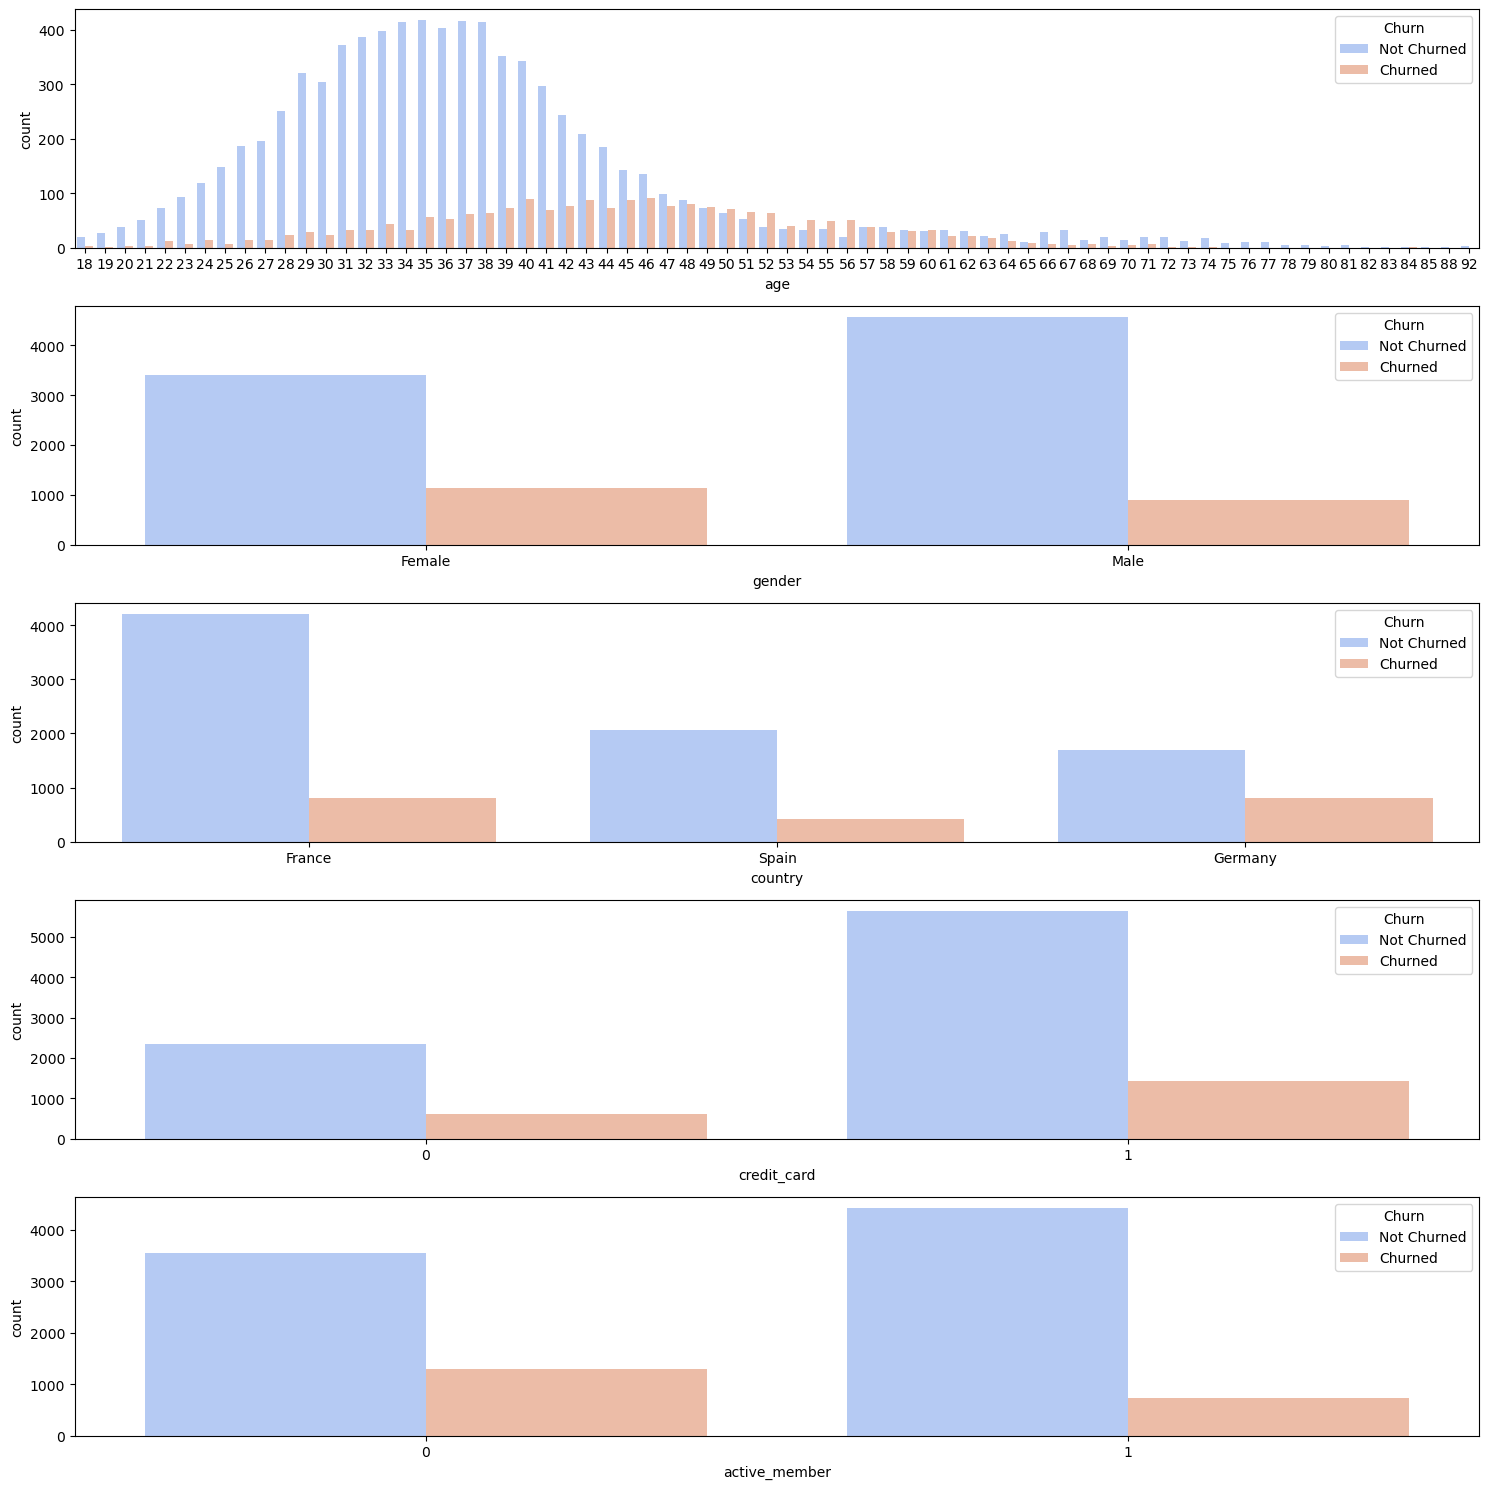

In [19]:
categorical_var = ['age','gender', 'country', 'credit_card','active_member']

plt.figure(figsize=(15,15))
for i,var in enumerate(categorical_var,1):
    plt.subplot(5,1,i)
    sns.countplot(x=customer_data[var], hue=customer_data['churn'], palette='coolwarm')
    plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import skew
balance_skewness = skew(customer_data['balance'])
creditscore_skewness = skew(customer_data['credit_score'])
print(f"Skewness of balance: {balance_skewness}")
print(f"Skewness of credit_score: {creditscore_skewness}")

Skewness of balance: -0.14108754375291138
Skewness of credit_score: -0.07159586676212397


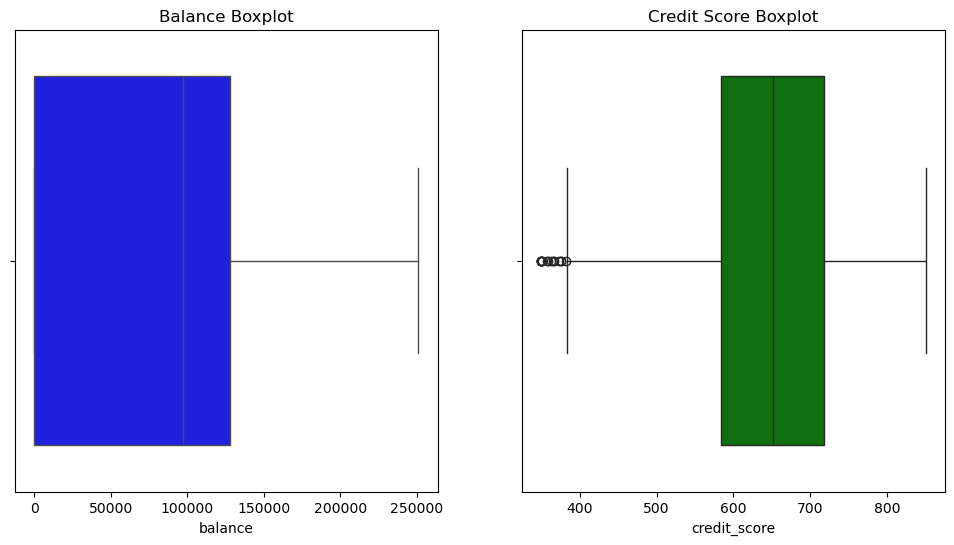

In [21]:
# Checking for outliers using boxplots
plt.figure(figsize=(12, 6))

# Balance
plt.subplot(1, 2, 1)
sns.boxplot(x=customer_data['balance'], color='blue')
plt.title('Balance Boxplot')

# Credit Score
plt.subplot(1, 2, 2)
sns.boxplot(x=customer_data['credit_score'], color='green')
plt.title('Credit Score Boxplot')

plt.show()

In [22]:
Q1_balance = customer_data['balance'].quantile(0.25)
Q3_balance = customer_data['balance'].quantile(0.75)
IQR_balance = Q3_balance - Q1_balance
balance_outliers = customer_data[(customer_data['balance'] < (Q1_balance - 1.5 * IQR_balance)) | 
                      (customer_data['balance'] > (Q3_balance + 1.5 * IQR_balance))]

Q1_credit = customer_data['credit_score'].quantile(0.25)
Q3_credit = customer_data['credit_score'].quantile(0.75)
IQR_credit = Q3_credit - Q1_credit
credit_outliers = customer_data[(customer_data['credit_score'] < (Q1_credit - 1.5 * IQR_credit)) | 
                     (customer_data['credit_score'] > (Q3_credit + 1.5 * IQR_credit))]

print(f"Number of balance outliers: {len(balance_outliers)}")
print(f"Number of credit score outliers: {len(credit_outliers)}")

Number of balance outliers: 0
Number of credit score outliers: 15


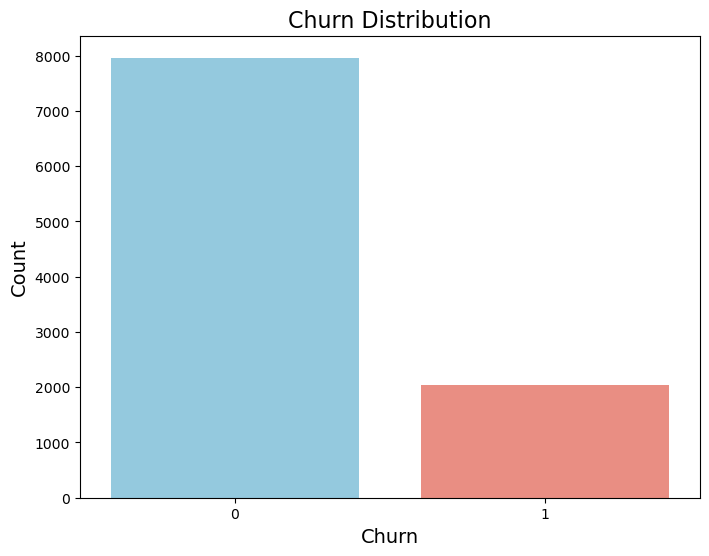

Churn Counts:
 churn
0    7963
1    2037
Name: count, dtype: int64

Churn Percentages:
 churn
0    79.63
1    20.37
Name: proportion, dtype: float64


In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=customer_data, palette=['skyblue', 'salmon'])

plt.title('Churn Distribution', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

churn_counts = customer_data['churn'].value_counts()
churn_percentages = customer_data['churn'].value_counts(normalize=True) * 100

print("Churn Counts:\n", churn_counts)
print("\nChurn Percentages:\n", churn_percentages)

In [24]:
customer_data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

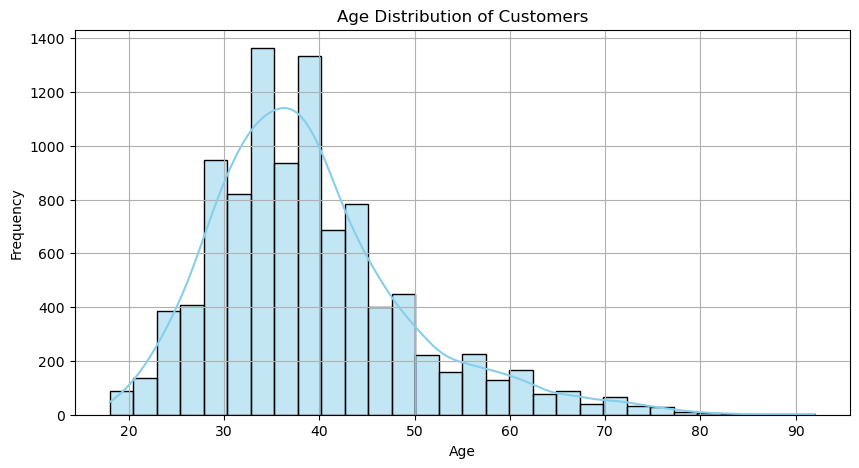

In [25]:
# Histogram for Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(customer_data['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

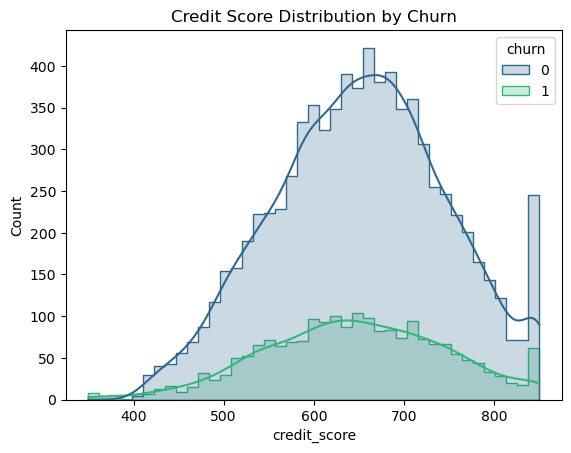

In [26]:
# credit_score vs Churn
sns.histplot(data=customer_data, x='credit_score', hue='churn', kde=True, palette="viridis", element="step")
plt.title('Credit Score Distribution by Churn')
plt.show()

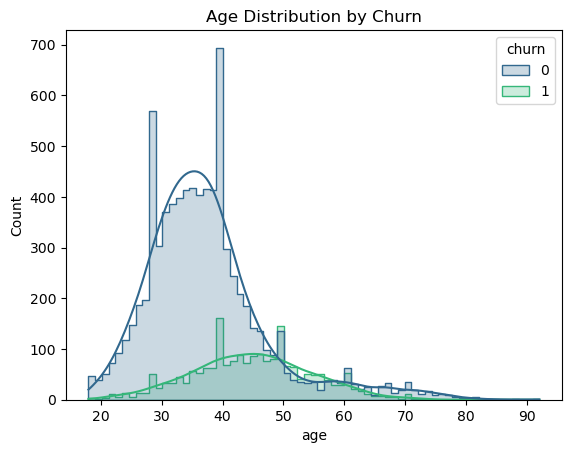

In [27]:
# Age vs Churn
sns.histplot(data=customer_data, x='age', hue='churn', kde=True, palette="viridis", element="step")
plt.title('Age Distribution by Churn')
plt.show()

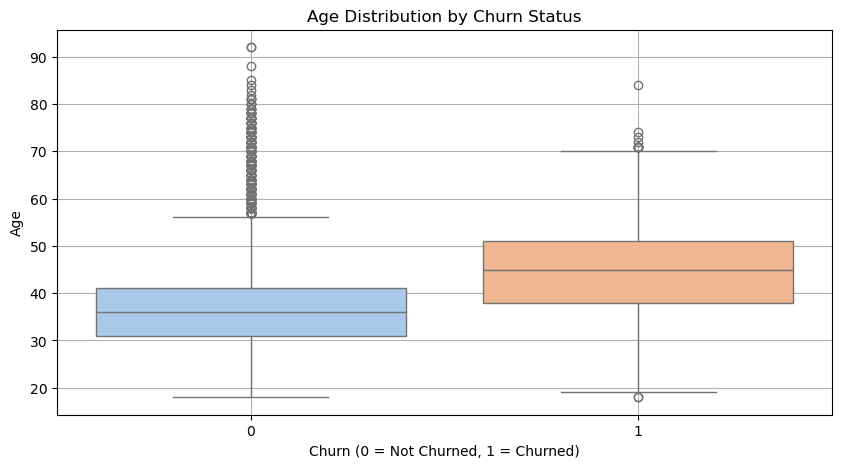

In [28]:
# Box Plot for Age vs. Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn', y='age', data=customer_data, palette='pastel')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
plt.ylabel('Age')
plt.grid()
plt.show()

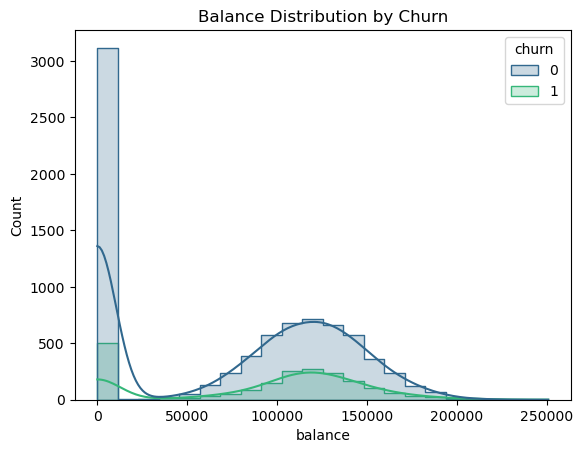

In [29]:
# Balance vs Churn
sns.histplot(data=customer_data, x='balance', hue='churn', kde=True, palette="viridis", element="step")
plt.title('Balance Distribution by Churn')
plt.show()

In [30]:
customer_data['zero_balance'] = (customer_data['balance'] == 0).astype(int)
print(customer_data[['balance', 'zero_balance']].head(10))

     balance  zero_balance
0       0.00             1
1   83807.86             0
2  159660.80             0
3       0.00             1
4  125510.82             0
5  113755.78             0
6       0.00             1
7  115046.74             0
8  142051.07             0
9  134603.88             0


In [31]:
# Churn by Country
churn_by_country = customer_data.groupby('country')['churn'].mean()
print("\nChurn Rate by Country:\n", churn_by_country)


Churn Rate by Country:
 country
France     0.161548
Germany    0.324432
Spain      0.166734
Name: churn, dtype: float64


In [32]:
# Churn by Gender
churn_by_gender = customer_data.groupby('gender')['churn'].mean()
print("\nChurn Rate by Gender:\n", churn_by_gender)


Churn Rate by Gender:
 gender
Female    0.250715
Male      0.164559
Name: churn, dtype: float64


In [33]:
# Churn by Active Member
churn_by_active_member = customer_data.groupby('active_member')['churn'].mean()
print("\nChurn Rate by Active Member:\n", churn_by_active_member)


Churn Rate by Active Member:
 active_member
0    0.268509
1    0.142691
Name: churn, dtype: float64


In [34]:
print("\nTenure by Churn:\n", customer_data.groupby('churn')['tenure'].mean())


Tenure by Churn:
 churn
0    5.033279
1    4.932744
Name: tenure, dtype: float64


In [35]:
# Churn by Number of Products
churn_by_products = customer_data.groupby('products_number')['churn'].mean()
print("\nChurn Rate by Number of Products:\n", churn_by_products)


Churn Rate by Number of Products:
 products_number
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: churn, dtype: float64


In [36]:
# Estimated Salary by Churn
print("\nEstimated Salary by Churn:\n", customer_data.groupby('churn')['estimated_salary'].mean())


Estimated Salary by Churn:
 churn
0     99738.391772
1    101465.677531
Name: estimated_salary, dtype: float64


In [37]:
# Conditional Statistics Based on Churn
print("Summary Statistics Grouped by Churn:")
# Select only numeric columns
numeric_data = customer_data.select_dtypes(include=[np.number])
churn_grouped_stats = numeric_data.groupby(customer_data['churn']).mean()
(churn_grouped_stats)

Summary Statistics Grouped by Churn:


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,zero_balance
churn,,,,,,,,,,,
0,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0,0.391435
1,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0,0.245459


In [38]:
customer_data['zero_balance'] = (customer_data['balance'] == 0).astype(int)
print(customer_data[['balance', 'zero_balance']].head(10))

     balance  zero_balance
0       0.00             1
1   83807.86             0
2  159660.80             0
3       0.00             1
4  125510.82             0
5  113755.78             0
6       0.00             1
7  115046.74             0
8  142051.07             0
9  134603.88             0


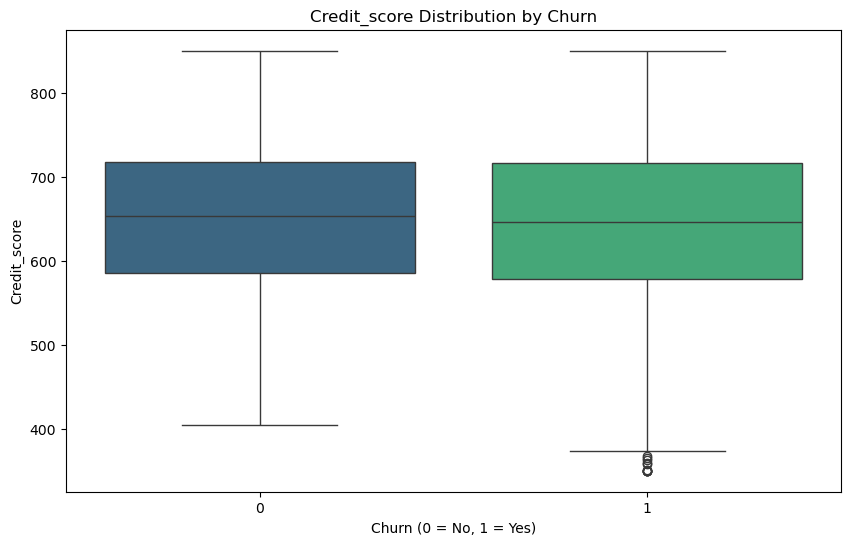

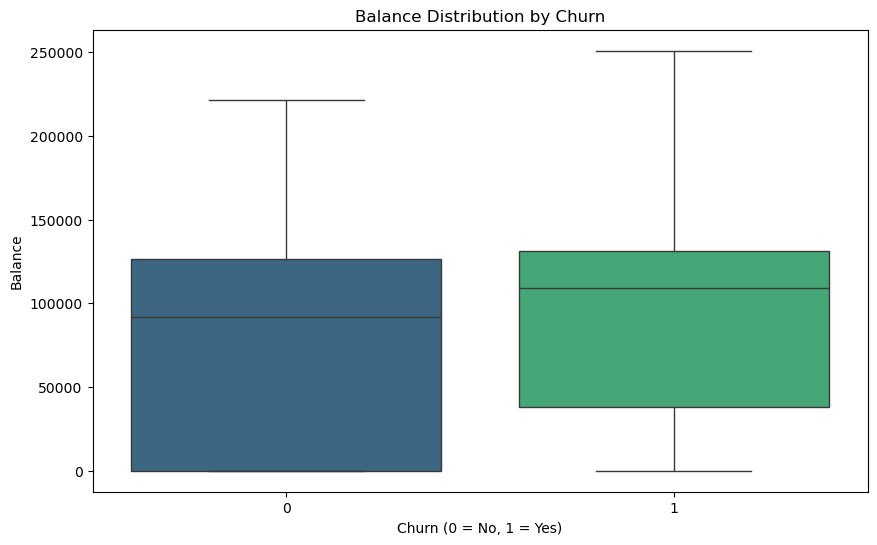

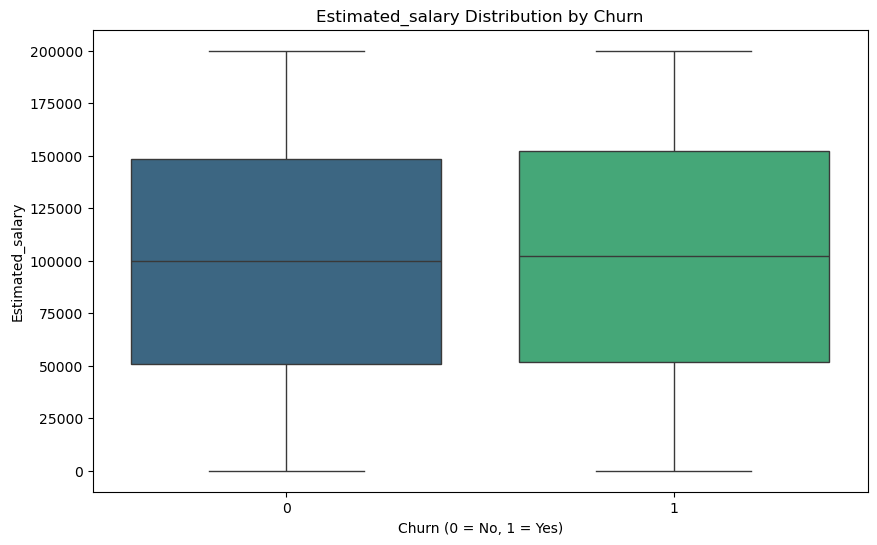

In [39]:
features = ['credit_score', 'balance', 'estimated_salary']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='churn', y=feature, data=customer_data, palette="viridis")
    plt.title(f'{feature.capitalize()} Distribution by Churn')
    plt.ylabel(f'{feature.capitalize()}')
    plt.xlabel('Churn (0 = No, 1 = Yes)')
    plt.show()

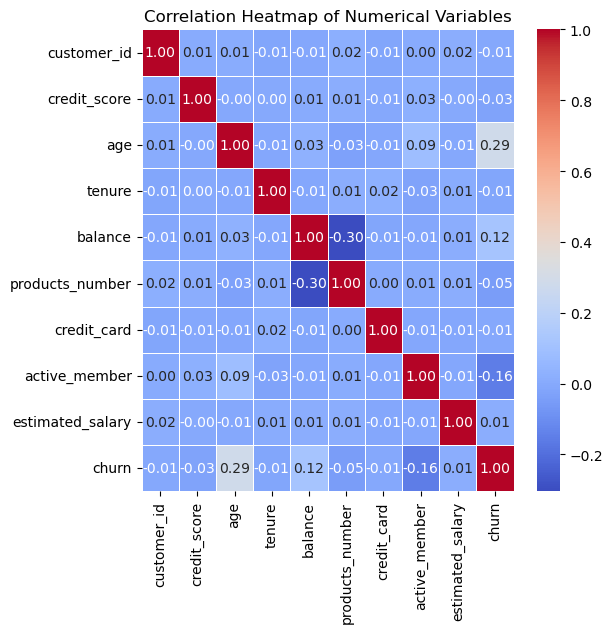

In [40]:
numerical_cols = customer_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_cols.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [41]:
# Encoding
customer_data = pd.get_dummies(customer_data, columns=['country', 'gender'], drop_first=True)
customer_data.head(10)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,zero_balance,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,False,True,False
5,15574012,645,44,8,113755.78,2,1,0,149756.71,1,0,False,True,True
6,15592531,822,50,7,0.00,2,1,1,10062.80,0,1,False,False,True
7,15656148,376,29,4,115046.74,4,1,0,119346.88,1,0,True,False,False
8,15792365,501,44,4,142051.07,2,0,1,74940.50,0,0,False,False,True
9,15592389,684,27,2,134603.88,1,1,1,71725.73,0,0,False,False,True


In [42]:
cols_scale = ['credit_score','age','tenure','balance','estimated_salary']
scale = StandardScaler()
customer_data[cols_scale] = scale.fit_transform(customer_data[cols_scale])
customer_data.drop('customer_id',axis=1,inplace=True)
customer_data.head(10)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,zero_balance,country_Germany,country_Spain,gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,1,False,False,False
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,0,False,True,False
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,1,0,False,False,False
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,1,False,False,False
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,0,False,True,False
5,-0.057205,0.484225,1.032908,0.597329,2,1,0,0.863650,1,0,False,True,True
6,1.774174,1.056346,0.687130,-1.225848,2,1,1,-1.565487,0,1,False,False,True
7,-2.840488,-0.946079,-0.350204,0.618019,4,1,0,0.334854,1,0,True,False,False
8,-1.547141,0.484225,-0.350204,1.050820,2,0,1,-0.437329,0,0,False,False,True
9,0.346319,-1.136786,-1.041760,0.931463,1,1,1,-0.493230,0,0,False,False,True


### LOGISTIC REGRESSION

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,mean_squared_error

# Splitting data
X = customer_data.drop('churn', axis=1)
y = customer_data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = LogisticRegression()

In [45]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'solver': ['liblinear', 'saga'],        # Solvers for optimization
    'penalty': ['l1', 'l2'],                # Regularization type
    'max_iter': [100, 200, 500]             # Number of iterations
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred)
log_mse = mean_squared_error(y_test, y_pred)
log_rmse = np.sqrt(log_mse)
log_precision = precision_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred)

In [46]:
# Print the results
print(f"Best Parameters: {best_params}")
print(f"Tuned Logistic Regression Accuracy: {log_accuracy * 100:.2f}%")

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 81.20%


[[1548   59]
 [ 317   76]]


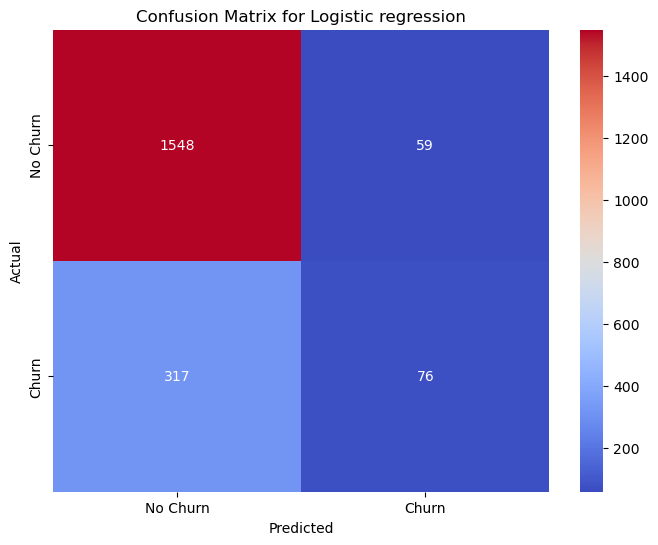

In [47]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic regression')
plt.show()

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 500],       # Number of trees
    'max_depth': [None, 10, 20, 30, 50],      # Maximum tree depth
    'min_samples_split': [2, 5, 10],          # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', None],   # Number of features for splits
    'bootstrap': [True, False],               # Use bootstrap samples
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    # n_iter=20,                     # Number of random combinations to try
    scoring='accuracy',
    cv=5,                          # Number of cross-validation folds
    random_state=42,
    n_jobs=-1                      # Use all available cores
)

# Ensure X_train and y_train are properly prepared (from earlier steps)
# Example: Ensure customer_data is a valid DataFrame, and 'churn' exists in the data
X = customer_data.drop('churn', axis=1)
y = customer_data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the RandomizedSearchCV object
print('entering the loop')
epoch=5
for i in range(epoch):
    print('number of  {}/{}'.format(i+1,epoch))
    random_search.fit(X_train, y_train)
    
# random_search.fit(X_train, y_train)
# with tqdm(total=random_search.n_iter) as pbar:
#     for _ in range(random_search.n_iter):
#         random_search.fit(X_train, y_train)
#         pbar.update(1)
# Get the best parameters and accuracy
best_rf_params = random_search.best_params_
best_rf_model = random_search.best_estimator_
rf_y_pred = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Print the results
print(f"Best Parameters: {best_rf_params}")
print(f"Tuned RandomForest Accuracy: {rf_accuracy * 100:.2f}%")

entering the loop
number of  1/5
number of  2/5
number of  3/5
number of  4/5
number of  5/5
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
Tuned RandomForest Accuracy: 86.50%


In [50]:
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=5,                     # Number of random combinations to try
    scoring='accuracy',
    cv=5,                          # Cross-validation splits
    random_state=42,
    n_jobs=-1                      # Use all available cores
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best parameters and accuracy
best_rf_params = random_search.best_params_
best_rf_model = random_search.best_estimator_
rf_y_pred = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test,rf_y_pred)
rf_recall = recall_score(y_test,rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

# Print the results
print(f"Best Parameters: {best_rf_params}")
print(f"Tuned RandomForest Accuracy: {rf_accuracy * 100:.2f}%")

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
Tuned RandomForest Accuracy: 86.50%


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 500],       # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples required to be a leaf node
    'max_features': ['sqrt', 'log2', None],   # Number of features to consider at every split
    'bootstrap': [True, False],               # Whether bootstrap samples are used when building trees
    
}


In [52]:
# Print the results
print(f"Best Parameters: {best_rf_params}")
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
print(f"Tuned RandomForest Accuracy: {rf_accuracy * 100:.2f}%")

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
Tuned RandomForest Accuracy: 86.50%


In [53]:
X_test.shape

(2000, 12)

[[1551   56]
 [ 214  179]]


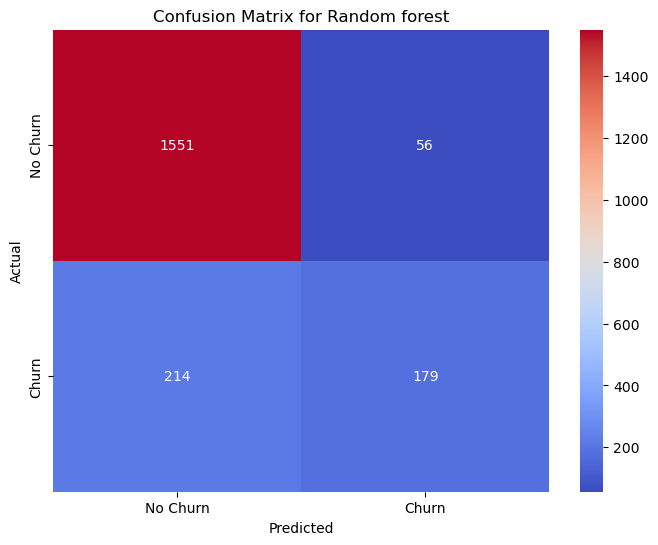

In [54]:
cm = confusion_matrix(y_test,rf_y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random forest')
plt.show()

In [55]:
print(X.dtypes)


credit_score        float64
age                 float64
tenure              float64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
zero_balance          int32
country_Germany        bool
country_Spain          bool
gender_Male            bool
dtype: object


In [56]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataset
X = customer_data.drop('churn', axis=1)

# Label encode the 'country' and 'gender' columns
label_encoder = LabelEncoder()
#X['country'] = label_encoder.fit_transform(X['country'])
#X['gender'] = label_encoder.fit_transform(X['gender'])

In [57]:
print(X.columns)

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'zero_balance',
       'country_Germany', 'country_Spain', 'gender_Male'],
      dtype='object')


In [58]:
X.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,zero_balance,country_Germany,country_Spain,gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,False,False,False
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,False,True,False
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,0,False,False,False
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,1,False,False,False
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,False,True,False


In [59]:
# Convert boolean columns to numeric (0 and 1)
X[['country_Germany', 'country_Spain', 'gender_Male']] = X[['country_Germany', 'country_Spain', 'gender_Male']].astype(int)

In [60]:
X = X.fillna(0)  # Replace NaN values with 0 (or handle appropriately)

## Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Extract target variable
y = customer_data['churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
dt_accuracy = accuracy_score(y_test, y_pred)
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")

Decision Tree Accuracy: 78.15%


[[1359  248]
 [ 189  204]]


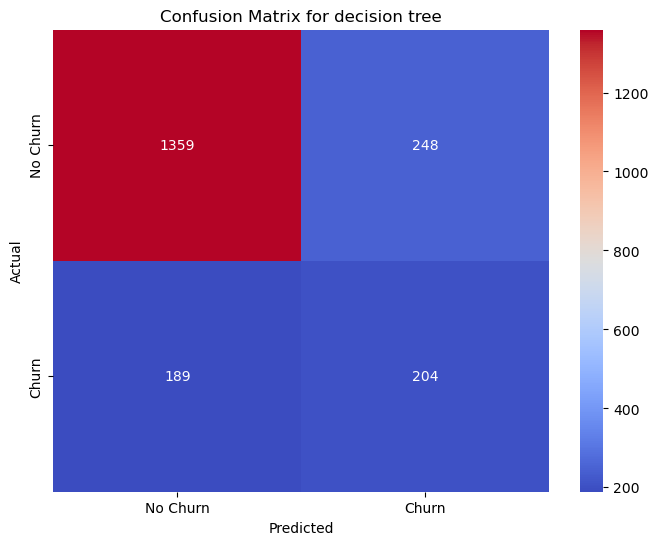

In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for decision tree')
plt.show()

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Encode categorical variables
label_encoder = LabelEncoder()

# Copy the dataset and drop the target variable
X = customer_data.drop('churn', axis=1)

# Label encode the 'country' and 'gender' columns
#X['country'] = label_encoder.fit_transform(X['country'])
#X['gender'] = label_encoder.fit_transform(X['gender'])

# Define the target variable
y = customer_data['churn']

# Feature scaling using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

SVM Accuracy: 85.60%


[[1564   43]
 [ 245  148]]


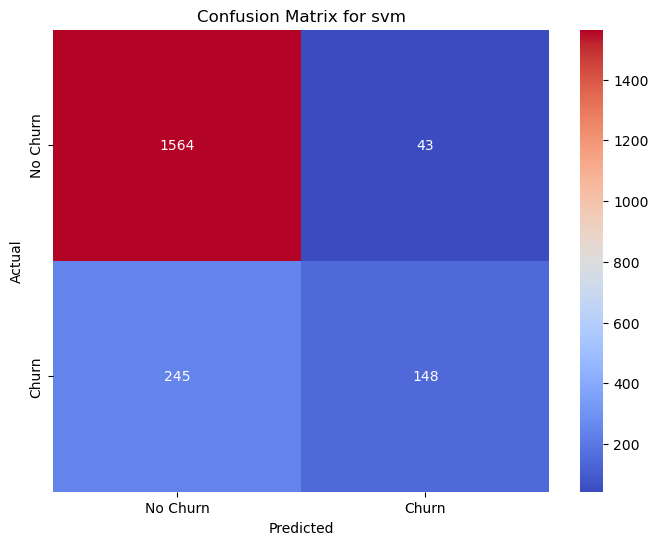

In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for svm')
plt.show()

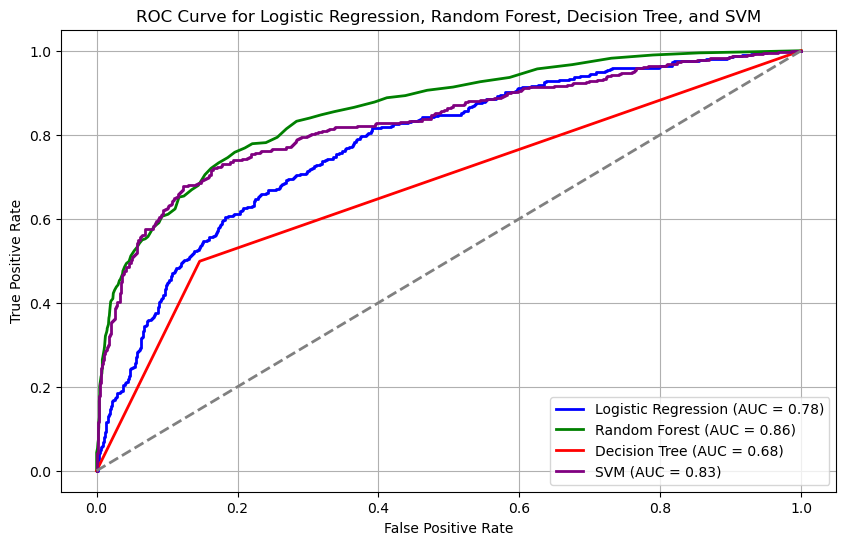

In [66]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you already have a DataFrame `customer_data` loaded with the features and target 'churn'

# Split data into features and target
X = customer_data.drop('churn', axis=1)
y = customer_data['churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (useful for models like SVM and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svm = SVC(probability=True)  # Set probability=True to use predict_proba()

# Fit models
log_reg.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
svm.fit(X_train_scaled, y_train)

# Get predicted probabilities for each model
y_pred_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred_rf = rf.predict_proba(X_test)[:, 1]
y_pred_dt = dt.predict_proba(X_test)[:, 1]
y_pred_svm = svm.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC for each model
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)

roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for all models
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Labels and title
plt.title('ROC Curve for Logistic Regression, Random Forest, Decision Tree, and SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


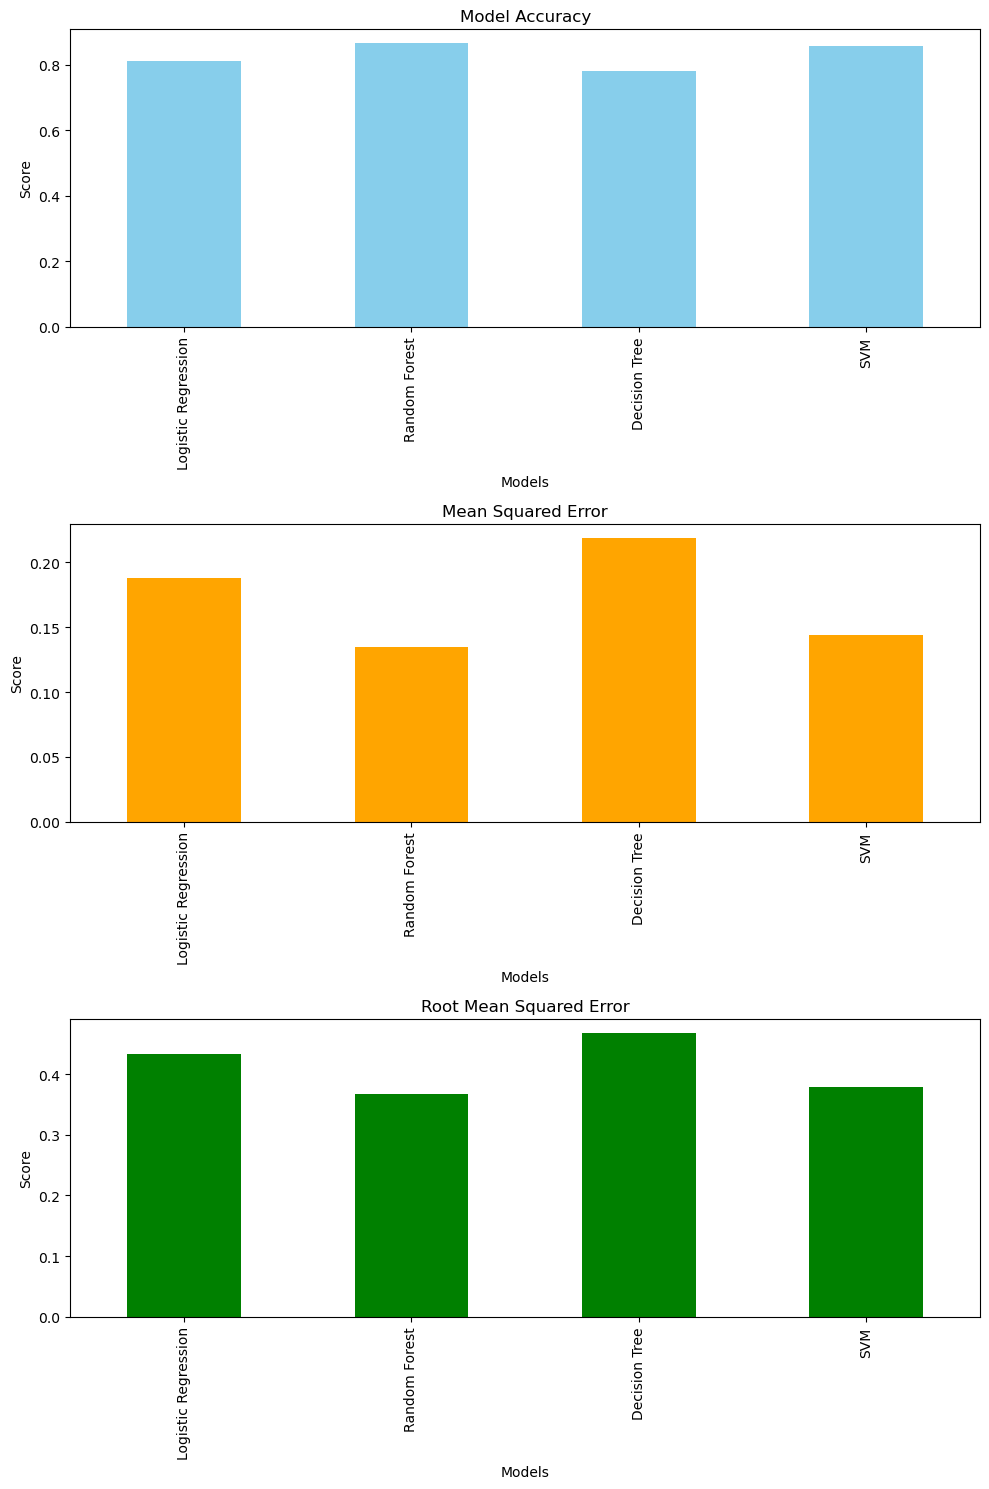

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

# Store results in a dictionary
metrics = {}

# Logistic Regression
metrics['Logistic Regression'] = [log_accuracy, log_mse, log_rmse]

# Random Forest
metrics['Random Forest'] = [rf_accuracy, rf_mse, rf_rmse]

# Decision Tree
metrics['Decision Tree'] = [dt_accuracy, dt_mse, dt_rmse]

# SVM
metrics['SVM'] = [svm_accuracy, svm_mse, svm_rmse]

# Convert metrics to a DataFrame for plotting
import pandas as pd
metrics_df = pd.DataFrame(metrics, index=['Accuracy', 'MSE', 'RMSE']).T

# Plot the metrics
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
metrics_df['Accuracy'].plot(kind='bar', ax=axes[0], color='skyblue', title='Model Accuracy')
metrics_df['MSE'].plot(kind='bar', ax=axes[1], color='orange', title='Mean Squared Error')
metrics_df['RMSE'].plot(kind='bar', ax=axes[2], color='green', title='Root Mean Squared Error')

# Set labels
for ax in axes:
    ax.set_ylabel('Score')
    ax.set_xlabel('Models')

plt.tight_layout()
plt.show()


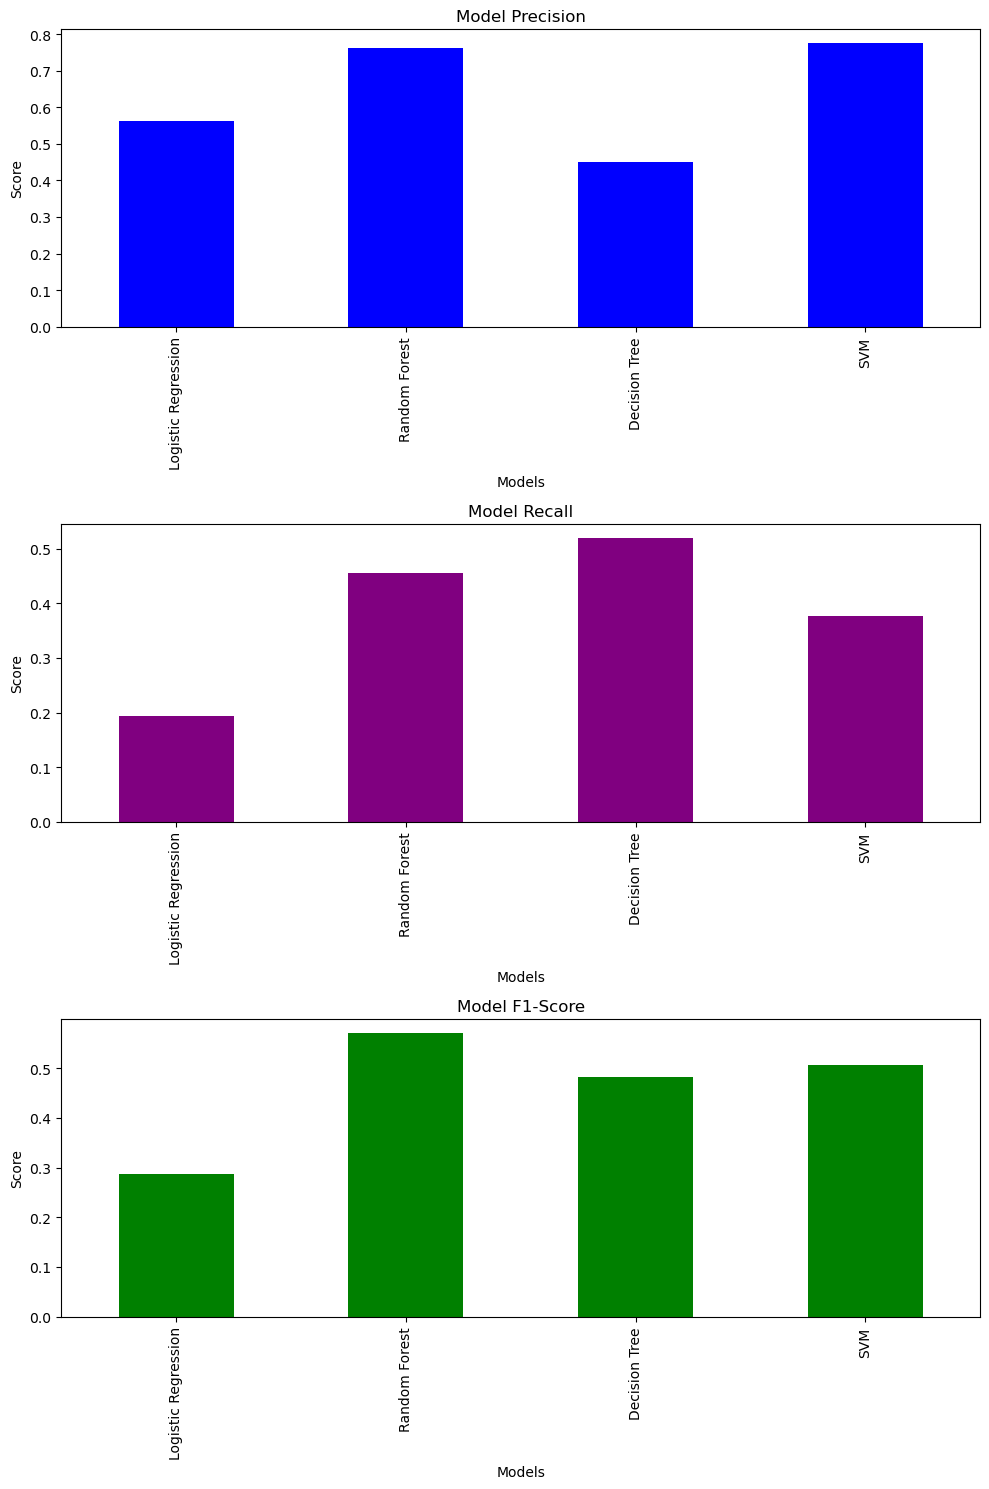

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Store results in a dictionary
metrics = {}

# Logistic Regression
metrics['Logistic Regression'] = [log_precision, log_recall, log_f1]

# Random Forest
metrics['Random Forest'] = [rf_precision, rf_recall, rf_f1]

# Decision Tree
metrics['Decision Tree'] = [dt_precision, dt_recall, dt_f1]

# SVM
metrics['SVM'] = [svm_precision, svm_recall, svm_f1]

# Convert metrics to a DataFrame for plotting
import pandas as pd
metrics_df = pd.DataFrame(metrics, index=['Precision', 'Recall', 'F1-Score']).T

# Plot the metrics
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
metrics_df['Precision'].plot(kind='bar', ax=axes[0], color='blue', title='Model Precision')
metrics_df['Recall'].plot(kind='bar', ax=axes[1], color='purple', title='Model Recall')
metrics_df['F1-Score'].plot(kind='bar', ax=axes[2], color='green', title='Model F1-Score')

# Set labels
for ax in axes:
    ax.set_ylabel('Score')
    ax.set_xlabel('Models')

plt.tight_layout()
plt.show()


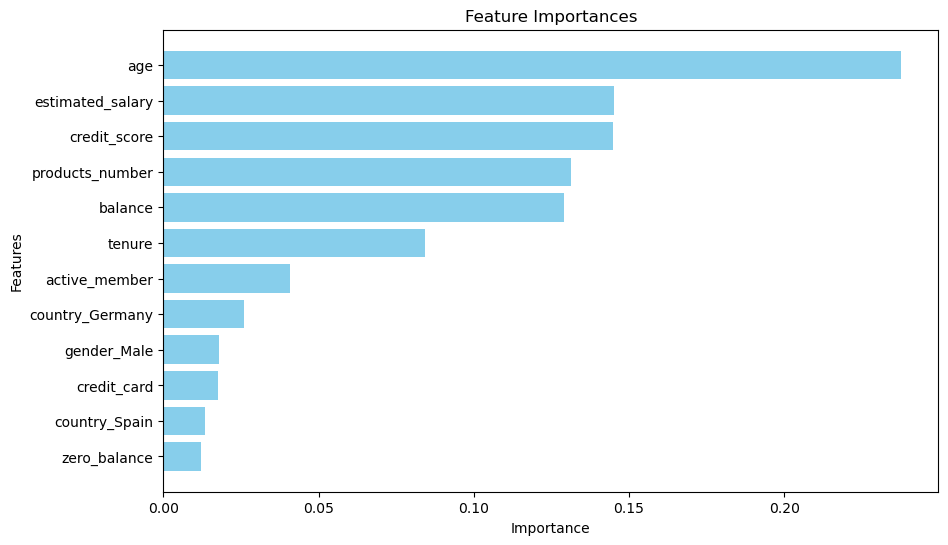

In [69]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Define the features (X) and target variable (y)
X = customer_data.drop(columns=['churn'])  # Drop the target column
y = customer_data['churn']  # Target column

# Initialize and fit the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their importance values
importance_df = pd.DataFrame({
    'Feature': X.columns,  # Use exact feature names from customer_data
    'Importance': importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()


### **Conclusions**  

#### **Model Performance and Evaluation**  
This project successfully developed a customer churn prediction system for the banking sector. The models were optimized using GridSearchCV with cross-validation, ensuring high accuracy and reliable predictions. The results showed:  

- Random Forest achieved the highest accuracy of **86.50%** and an **AUC score of 0.86**, making it the most effective model.  
- Support Vector Machine (SVM) followed with an **AUC of 0.83**, demonstrating strong classification performance.  
- Logistic Regression had an **AUC of 0.78**, performing well in identifying churn patterns.  
- Decision Tree had the lowest **AUC of 0.67**, making it the least effective model among those tested.  

#### **Key Factors Influencing Customer Churn**  
The analysis identified several key factors contributing to customer churn:  

- **Age:** Older customers were more likely to leave.  
- **Balance:** A weak positive correlation was found between higher balances and churn.  
- **Active Membership:** Inactive customers showed a significantly higher churn rate.  
- **Number of Products Used:** Customers using fewer banking products had a higher tendency to churn.  

#### **Business Insights & Recommendations**  
This project provides valuable insights to improve customer retention strategies:  

- **Identify high-risk customers early** and offer personalized incentives to improve retention.  
- **Enhance customer engagement** through targeted communication, financial product recommendations, and exclusive benefits.  
- **Implement a real-time monitoring system** to flag high-risk customers for proactive intervention.  
- **Encourage inactive customers** to use more banking services through personalized outreach and loyalty programs.  

#### **Future Scope**  
This project provides a deployment-ready, high-accuracy customer churn prediction system with actionable insights. To ensure long-term adaptability, the system is designed for seamless enhancements in the following ways:  

- **Periodic Model Retraining:** As customer behavior evolves, updating the model with new data will help maintain accuracy and relevance in identifying churn patterns.  
- **Feature Expansion:** Additional behavioral and transaction-based attributes can be integrated to refine predictions and improve decision-making.  
- **Real-Time System Integration:** The model architecture allows seamless deployment into banking systems for automated risk assessment and proactive retention strategies.  
- **Scalability for Larger Datasets:** The system can be optimized to handle increased data volume, ensuring efficiency across diverse customer segments.  

By continuously adapting to changing business needs, this churn prediction system will remain an essential tool for customer retention.  

### **Final Takeaway**  
This project successfully developed a high-performance machine learning model for customer churn prediction, with Random Forest emerging as the most accurate and reliable approach. The insights gained from this analysis enable banks to minimize customer attrition by leveraging data-driven retention strategies. With ongoing adaptation to evolving customer behaviors, this model ensures sustained accuracy and effectiveness, providing a valuable foundation for strategic decision-making and long-term customer retention.